<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np

def sum_prod(X, V):
    '''
    X - список матриц размера (n, n)
    V - список векторов размера (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    total = np.zeros_like(V[0])
    for i in range(len(X)):
        total += np.matmul(X[i], V[i])
    return total

X = [np.array([[1, 2], [3, 4]]), np.array([[2, 0], [1, 2]])]
V = [np.array([[1], [1]]), np.array([[2], [3]])]

result = sum_prod(X, V)
expected = np.matmul(X[0], V[0]) + np.matmul(X[1], V[1])

assert np.array_equal(result, expected)

print("Все тесты пройдены")


Все тесты пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
import numpy as np

def binarize(M, threshold=0.5):
    M = np.array(M)
    return (M > threshold).astype(int)

M1 = [[0.2, 0.6], [0.4, 0.7]]
assert np.array_equal(binarize(M1, 0.5), np.array([[0, 1], [0, 1]]))

M2 = [[0, 0.5, 0.5], [0.5, 0, 1], [0.7, 0.4, 0.3]]
assert np.array_equal(binarize(M2, 0.5), np.array([[0, 0, 0], [0, 0, 1], [1, 0, 0]]))

M3 = np.array([[1, 1], [1, 1]])
assert np.array_equal(binarize(M3, 0.9), np.array([[1, 1], [1, 1]]))

M4 = np.zeros((3, 3))
assert np.array_equal(binarize(M4, 0), np.zeros((3, 3)))

print("Все тесты пройдены")


Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
import numpy as np

def unique_rows(mat):
    result = []
    for row in mat:
        unique_elems = np.unique(row)
        result.append(unique_elems)
    return result

def unique_columns(mat):
    result = []
    mat_t = np.transpose(mat)
    for col in mat_t:
        unique_elems = np.unique(col)
        result.append(unique_elems)
    return result

mat = np.array([[1, 2, 2, 3],
                [4, 4, 5, 6],
                [7, 8, 7, 8]])

# Уникальные элементы по строкам
assert all(np.array_equal(a, b) for a, b in zip(unique_rows(mat), [np.array([1,2,3]), np.array([4,5,6]), np.array([7,8])]))

# Уникальные элементы по столбикаам
assert all(np.array_equal(a, b) for a, b in zip(unique_columns(mat), [np.array([1,4,7]), np.array([2,4,8]), np.array([2,5,7]), np.array([3,6,8])]))

print("Все тесты пройдены")


Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание по строкам: [ 0.18503577 -0.58454826 -0.39811088 -0.46684756 -0.46061362]
Дисперсия по строкам: [0.26586858 0.51655445 0.13102324 0.08964323 0.55068744]
Математическое ожидание по столбцам: [-0.89628624 -0.12418447 -0.01458003]
Дисперсия по столбцам: [0.25748095 0.35987542 0.07466966]


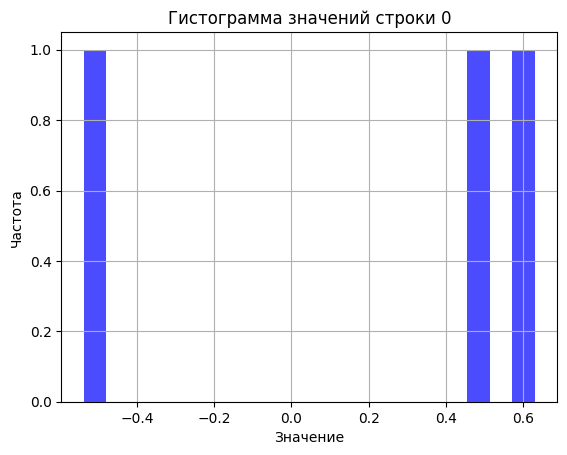

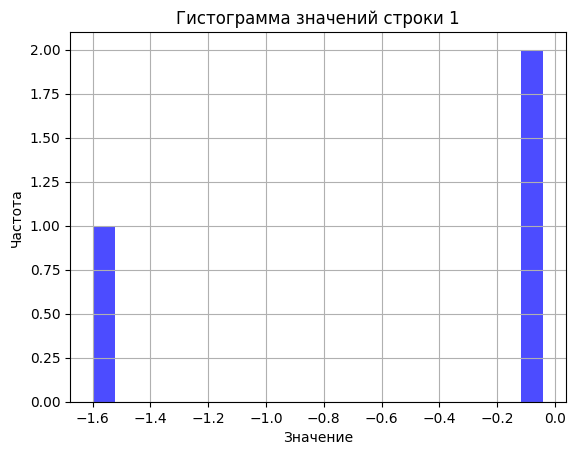

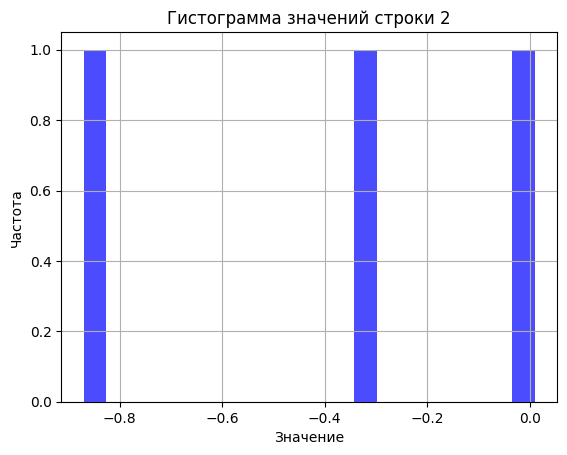

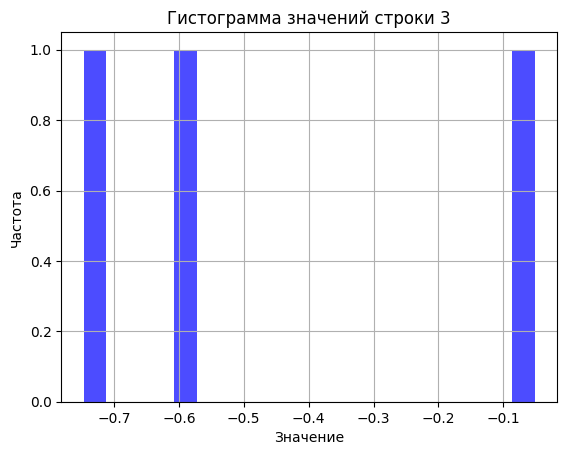

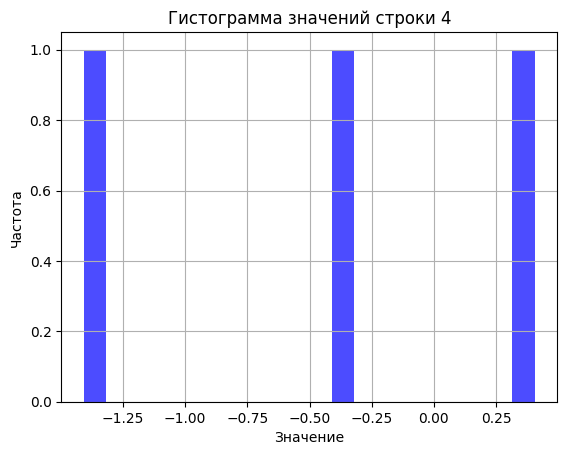

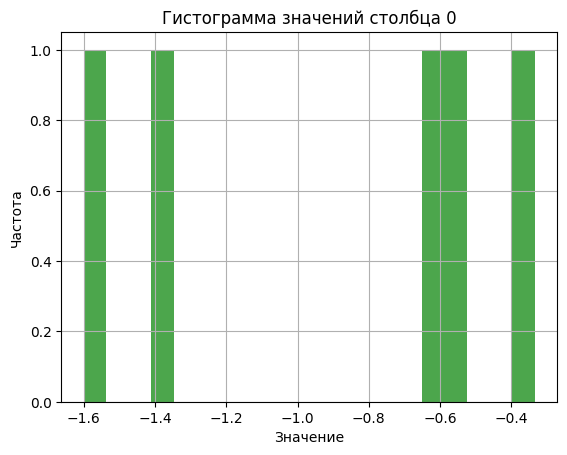

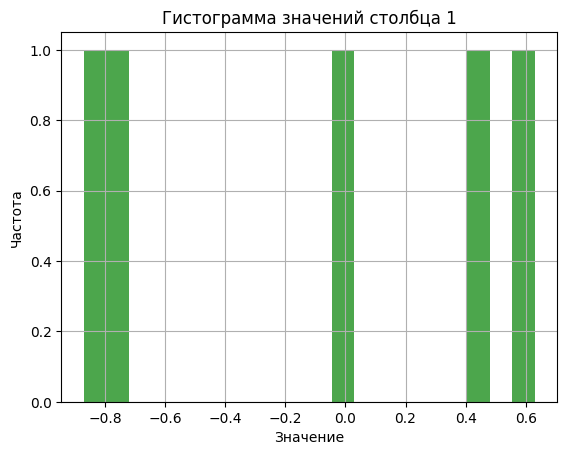

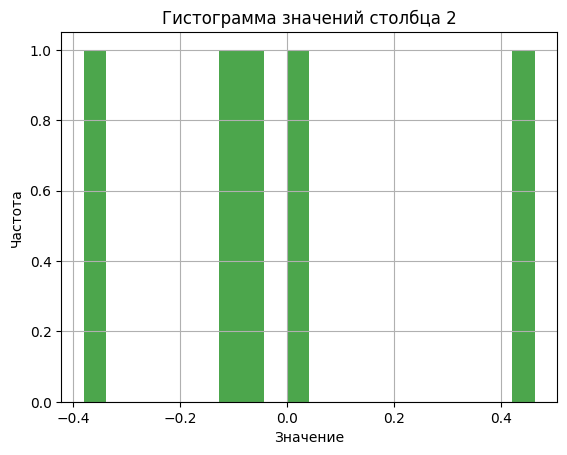

(array([[-0.53777876,  0.62985309,  0.46303298],
        [-1.60005266, -0.03944905, -0.11414308],
        [-0.33395894, -0.87001437,  0.00964067],
        [-0.60244084, -0.746435  , -0.05166685],
        [-1.40719999,  0.40512299, -0.37976385]]),
 array([ 0.18503577, -0.58454826, -0.39811088, -0.46684756, -0.46061362]),
 array([0.26586858, 0.51655445, 0.13102324, 0.08964323, 0.55068744]),
 array([-0.89628624, -0.12418447, -0.01458003]),
 array([0.25748095, 0.35987542, 0.07466966]))

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_matrix(m, n):
    M = np.random.randn(m, n)
    
    # Вычисление мат.ожидания и дисперсии для строк и столбцов
    mean_rows = M.mean(axis=1)
    var_rows = M.var(axis=1)
    mean_cols = M.mean(axis=0)
    var_cols = M.var(axis=0)

    print("Математическое ожидание по строкам:", mean_rows)
    print("Дисперсия по строкам:", var_rows)
    print("Математическое ожидание по столбцам:", mean_cols)
    print("Дисперсия по столбцам:", var_cols)

    # гистограммы для каждой строки
    for i in range(m):
        plt.figure()
        plt.hist(M[i,:], bins=20, color='blue', alpha=0.7)
        plt.title(f'Гистограмма значений строки {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)

    # гистограммы для каждого столбца
    for j in range(n):
        plt.figure()
        plt.hist(M[:,j], bins=20, color='green', alpha=0.7)
        plt.title(f'Гистограмма значений столбца {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)

    plt.show()

    return M, mean_rows, var_rows, mean_cols, var_cols

analyze_matrix(5, 3)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
import numpy as np

def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat


expected_1 = np.array([[1, 0, 1],
                       [0, 1, 0],
                       [1, 0, 1]])
assert np.array_equal(chess(3, 3, 1, 0), expected_1)

expected_2 = np.array([[5, 10],
                       [10, 5]])
assert np.array_equal(chess(2, 2, 5, 10), expected_2)

expected_3 = np.array([[3.5, 2.5],
                       [2.5, 3.5]])
assert np.array_equal(chess(2, 2, 3.5, 2.5), expected_3)

print("Все тесты пройдены")


Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

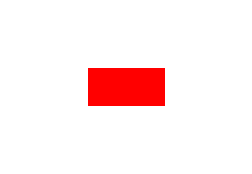

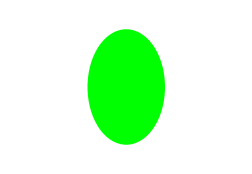

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(figsize=(n/100, m/100))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(background_color)
    rectangle = patches.Rectangle(((n - a) / 2, (m - b) / 2), a, b, linewidth=1, edgecolor='none', facecolor=rectangle_color)
    ax.add_patch(rectangle)
    plt.gca().invert_yaxis()  # чтобы (0,0) был слева сверху
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(figsize=(n/100, m/100))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(background_color)
    ellipse = patches.Ellipse(((n) / 2, (m) / 2), 2*a, 2*b, linewidth=1, edgecolor='none', facecolor=ellipse_color)
    ax.add_patch(ellipse)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()


draw_rectangle(100, 50, 200, 300, rectangle_color=(1,0,0), background_color=(0,0,0))
draw_ellipse(50, 75, 200, 300, ellipse_color=(0,1,0), background_color=(0,0,0))


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
import numpy as np

def analyze_time_series(series, p):
    series = np.array(series)
    
    # ср. Математическое ожидание 
    mean = np.mean(series)
    
    # Дисперсия
    variance = np.var(series)
    
    # СКО
    std_dev = np.std(series)
    

    local_max = (np.diff(np.sign(np.diff(series))) < 0).nonzero()[0] + 1
    local_min = (np.diff(np.sign(np.diff(series))) > 0).nonzero()[0] + 1
    
    # Скользящее среднее с окном p
    if p > 0 and p <= len(series):
        moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    else:
        moving_avg = np.array([])  
    
    return {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maximums': local_max,
        'local_minimums': local_min,
        'moving_average': moving_avg
    }


series = [1, 3, 2, 4, 3, 5, 7, 6, 8, 7]
result = analyze_time_series(series, 3)

assert abs(result['mean'] - np.mean(series)) < 1e-9
assert abs(result['variance'] - np.var(series)) < 1e-9
assert abs(result['std_dev'] - np.std(series)) < 1e-9
assert np.array_equal(result['local_maximums'], np.array([1, 3, 6, 8]))
assert np.array_equal(result['local_minimums'], np.array([2, 4, 7]))
assert np.allclose(result['moving_average'], np.convolve(series, np.ones(3)/3, mode='valid'))

print("Все тесты пройдены")


Все тесты пройдены


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
import numpy as np

def one_hot_encode(labels):
    labels = np.array(labels)
    max_class = np.max(labels)
    num_classes = max_class + 1  # классы от 0 до max_class
    
    one_hot = np.zeros((labels.size, num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    
    return one_hot

# Тестовый пример
labels = [0, 2, 3, 0]
expected = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
])
encoded = one_hot_encode(labels)

assert np.array_equal(encoded, expected)
print("Тест пройден успешно")

AssertionError: 